In [141]:
import os
import time

import numpy as np
import ipyvolume as ipv
from pathlib import Path

from tyssue import Sheet, config
from tyssue.io import hdf5
from tyssue.draw.ipv_draw import view_ipv
from tyssue.draw.ipv_draw import sheet_view as ipv_sheet_view
from tyssue.draw.ipv_draw import view_ipv
from tyssue.core.sheet import get_opposite
from tyssue.draw.plt_draw import quick_edge_draw,sheet_view

from invagination.toolbox import (open_sheet,
                                 define_depth)

import matplotlib.pyplot as plt
%matplotlib inline

SIM_DIR = Path('/home/admin-suz/Documents/Simulations/Ablations/AugmentationNbVoisin/2018-11-29_TEST1')
#SIM_DIR = Path('/home/admin-suz/Documents/Simulations/Surface_tension/2018-11-28')

#SIM_DIR = Path('/media/admin-suz/Sophie/SimulationsReview/2018-08-22_TEST5')
#SIM_DIR = Path('/media/admin-suz/Sophie/2018/datas/Simulations/2018-05-29_principal_results/')

old = None

In [142]:
import datetime
today = datetime.date.today()
dirname = SIM_DIR/f'{today.isoformat()}'


dirname = SIM_DIR/'1.32_contractility_5_critical_area_30_radialtension_1/'

In [132]:
sheet.face_df[sheet.face_df.is_relaxation][["contractility", "area"]].sort_values(["contractility"])

,contractility,area
face,,
68,0.642792,47.325112
3381,0.642792,48.875470
3380,0.642792,47.658912
3293,0.642792,46.333723
3292,0.642792,46.168449
3267,0.642792,48.418524
3266,0.642792,45.798886
3261,0.642792,46.026790
2605,0.642792,50.052420


677

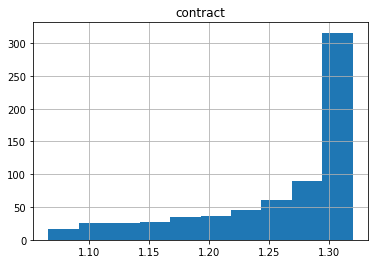

In [85]:
import csv
#with open('/home/admin-suz/Documents/test.csv', 'rb') as csvfile:
import pandas as pd
df = pd.read_csv('/home/admin-suz/Documents/Code/test.csv', index_col=False)
df.hist(column='contract')
len(df)
#plt.plot(df['contract'], '.')


In [279]:
pulling_vert = sheet.vert_df[sheet.vert_df.radial_tension>0].index
pulling_face = sheet.edge_df[sheet.edge_df.srce.isin(pulling_vert)].face.unique()
sheet.face_df[sheet.face_df.index.isin(pulling_face)].is_mesoderm

face
806     True
807     True
808     True
809     True
2172    True
2493    True
3380    True
3381    True
3620    True
3631    True
3964    True
4718    True
4719    True
4898    True
4903    True
4905    True
4952    True
5296    True
5478    True
5619    True
5620    True
Name: is_mesoderm, dtype: bool

## 3D view

/home/admin-suz/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


FileNotFoundError: file /home/admin-suz/Documents/Simulations/Ablations/AugmentationNbVoisin/2018-11-29_TEST1/1.32_contractility_5_critical_area_30_radialtension_1/invagination_0033.hf5 not found

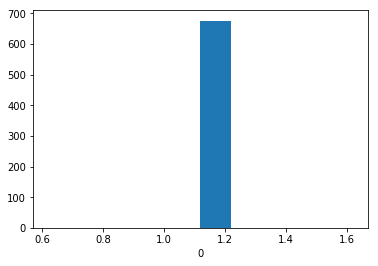

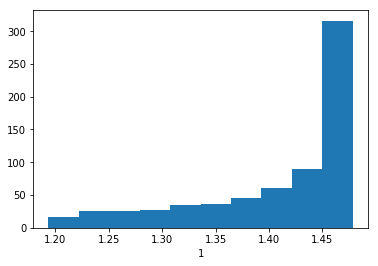

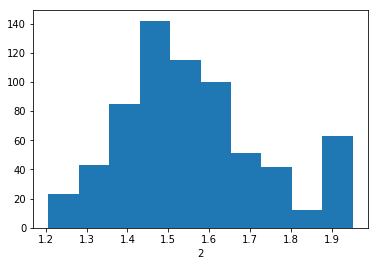

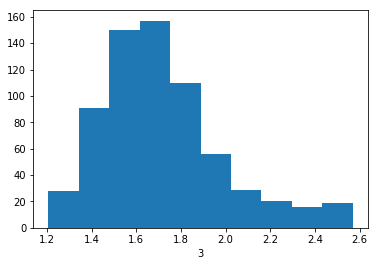

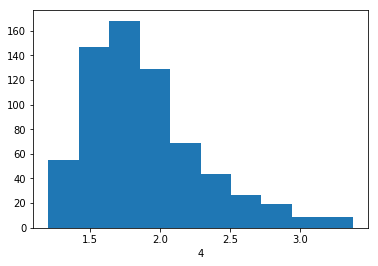

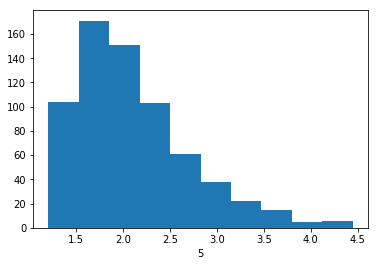

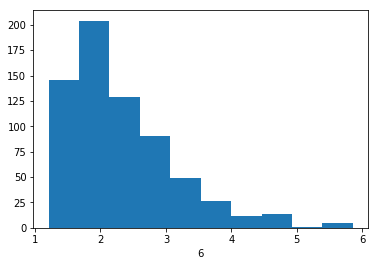

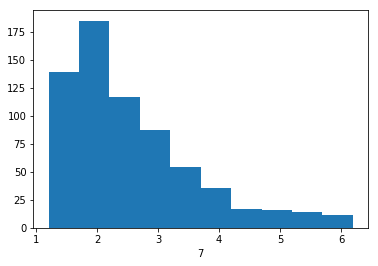

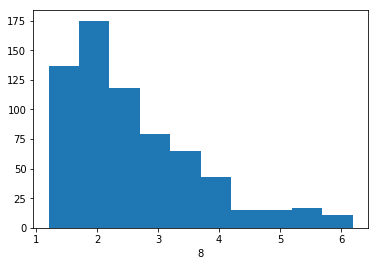

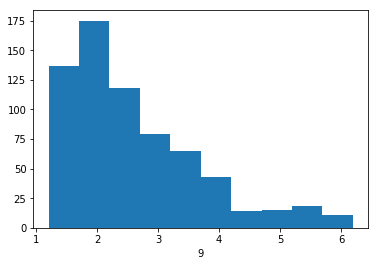

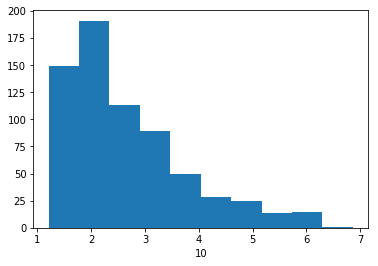

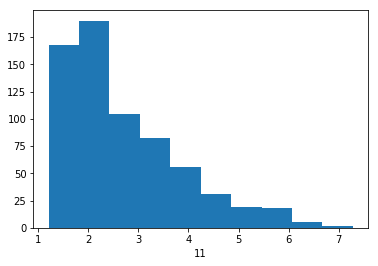

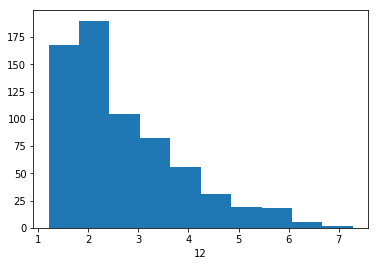

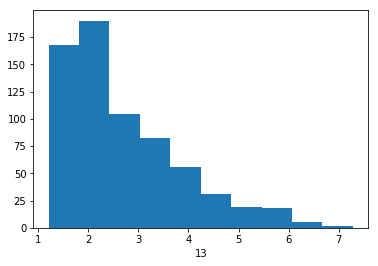

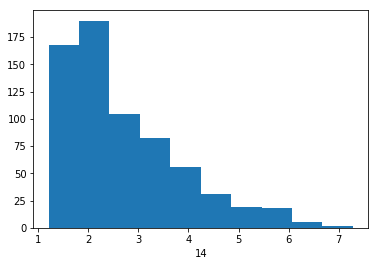

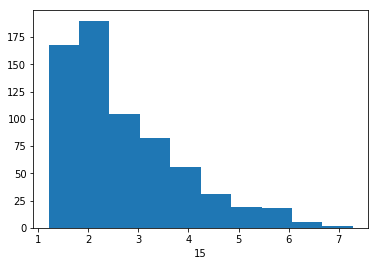

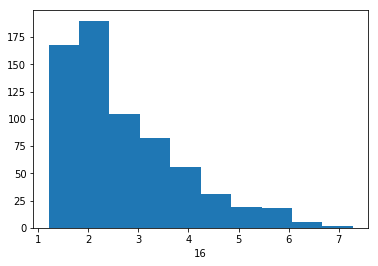

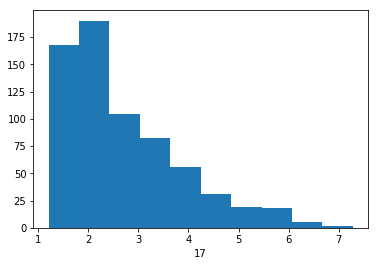

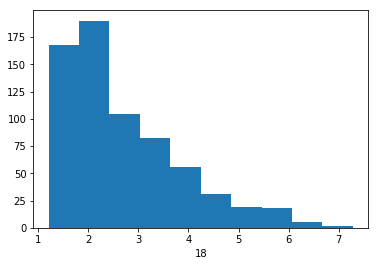

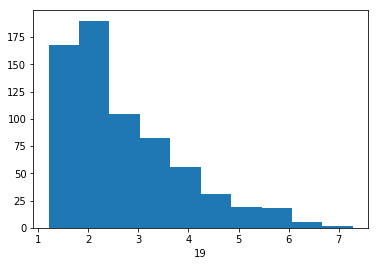

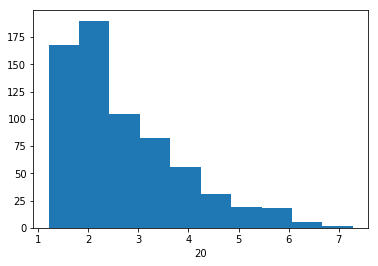

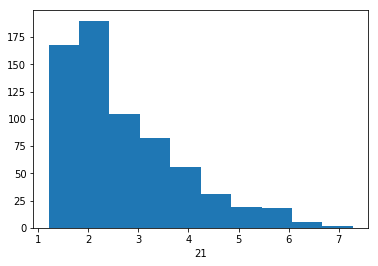

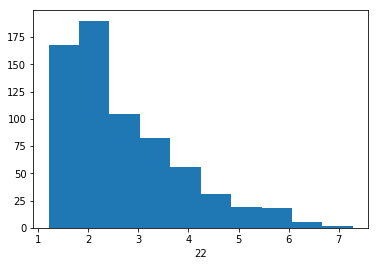

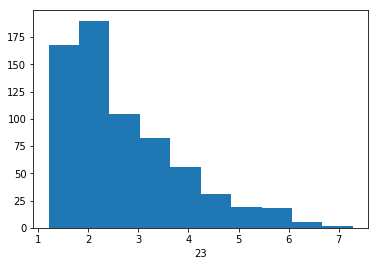

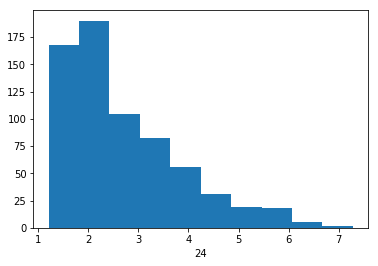

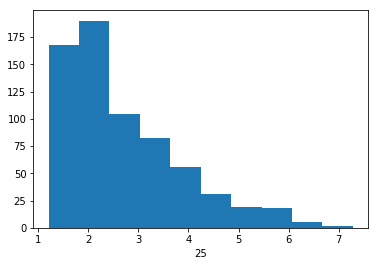

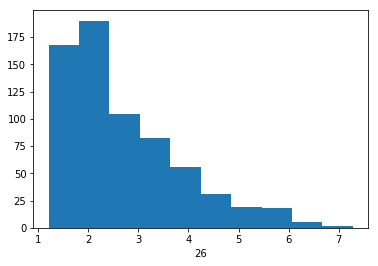

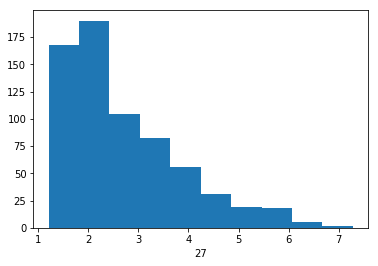

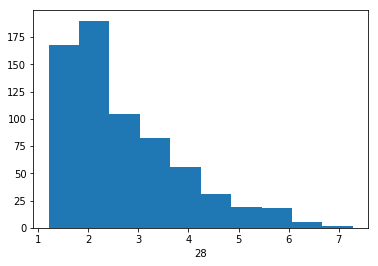

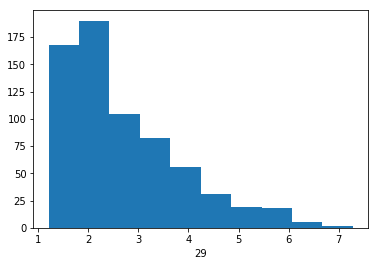

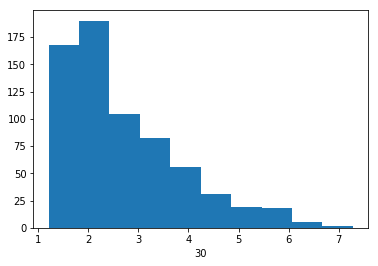

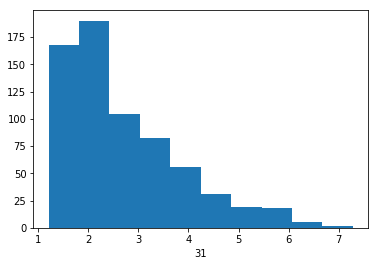

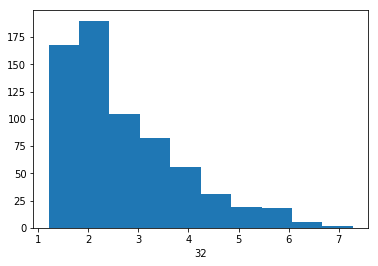

In [87]:
#plt.hist(sheet.face_df[sheet.face_df.is_mesoderm]['contractility'])
#model.energy()
#sheet.face_df[sheet.face_df.is_mesoderm]['contractility'].mean()
id_cell = 4964
l_contra=[]
for i in range (0, 10):
    current = 'invagination_000'+str(i)+'.hf5'
    ipv.clear()
    ipv.style.use('dark')


    dsets = hdf5.load_datasets(os.path.join(dirname, current),
                                   data_names=['vert', 'edge', 'face', 'cell'])

    specs = config.geometry.cylindrical_sheet()
    sheet = Sheet('ellipse', dsets, specs)
    fig, ax = plt.subplots()
    ax.hist(sheet.face_df[sheet.face_df.is_mesoderm]['contractility'])
    ax.set_xlabel(i)
    l_contra.append(sheet.face_df.loc[id_cell, 'contractility'])
    
for i in range (10, 50):
    current = 'invagination_00'+str(i)+'.hf5'
    ipv.clear()
    ipv.style.use('dark')


    dsets = hdf5.load_datasets(os.path.join(dirname, current),
                                   data_names=['vert', 'edge', 'face', 'cell'])

    specs = config.geometry.cylindrical_sheet()
    sheet = Sheet('ellipse', dsets, specs)
    fig, ax = plt.subplots()
    ax.hist(sheet.face_df[sheet.face_df.is_mesoderm]['contractility'])
    ax.set_xlabel(i)
    l_contra.append(sheet.face_df.loc[id_cell, 'contractility'])


In [143]:
from tyssue.draw import sheet_view

import ipyvolume.pylab as p3
hfs = [f  for f in os.listdir(dirname)
       if f.endswith('hf5')]
hfs.sort(key=lambda x: os.path.getctime(os.path.join(dirname, x)))

current = 'invagination_0001.hf5'
ipv.clear()
ipv.style.use('dark')


dsets = hdf5.load_datasets(os.path.join(dirname, current),
                               data_names=['vert', 'edge', 'face', 'cell'])

specs = config.geometry.cylindrical_sheet()
sheet = Sheet('ellipse', dsets, specs)

#sheet = sheet.extract_bounding_box(z_boundary=[-200,50])
def draw_specs(sheet):
    specs = {
        'edge': {
            'visible': True,
            'color': sheet.vert_df.y
        },
        'face': {
            'visible': True,
            'color': sheet.face_df.area,
            'colormap': 'Blues'
        }
    }
    return specs

ipv.clear()
ipv_fig, meshes = sheet_view(sheet, coords=list('zxy'),
                             mode='3D', **draw_specs(sheet))
ipv_fig

Figure(camera_center=[0.0, 0.0, 0.0], height=500, matrix_projection=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], matrix_world=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], meshes=[Mesh(color=array([[0.274128, 0.199721, 0.498911],
       [0.535621, 0.835785, 0.281908],
       [0.283072, 0.130895, 0.449241],
       ...,
       [0.647257, 0.8584  , 0.209861],
       [0.143303, 0.669459, 0.511215],
       [0.225863, 0.330805, 0.547314]]), lines=array([[11751, 11828],
       [11284, 11601],
       [ 7582,  7583],
       ...,
       [ 4911,  4909],
       [ 8943,  8949],
       [    0,  1365]], dtype=uint32), texture=None, x=array([ 87.80690104, -76.90670885,  85.6284523 , ...,  68.22634182,
        62.93017799,  -9.04403024]), y=array([-33.32867107, -48.34480174,  -2.87515212, ..., -43.27252159,
        74.92961472,  74.66071868]), z=array([-60.05475264,  54.89030562, -69.46925584, ...,  62.32243458,
        19.18115194, -40.72872844])), Mesh(color=array([[0.32124567, 0.61517878, 0.80083045],
       [0.37673203, 0.6530719 , 0.82248366],
       [0.30106882, 0.60139946, 0.79295656],
       ...,
       [0.29602461, 0.59795463, 0.79098808],
       [0.25628604, 0.57001153, 0.7751634 ],
       [0.32124567, 0.61517878, 0.80083045]]), texture=None, triangles=array([[ 5787,  5939, 41561],
       [ 5802,  5940, 41562],
       [ 4719,  5941, 41563],
       ...,
       [ 3648, 41558, 77180],
       [ 1467, 41559, 77181],
       [    0, 41560, 77182]], dtype=uint32), x=array([ 84.74527863,  89.84050696,  89.15782652, ..., -29.5961069 ,
       -74.44741185,  87.03389431]), y=array([-34.26799579, -34.80936196, -30.53795643, ...,  83.25872437,
       -37.66909478, -35.81667448]), z=array([-60.97160218, -58.01532342, -60.7046626 , ...,   6.68328151,
       -63.64811346, -58.99656247]))], style={'axes': {'visible': False, 'label': {'color': 'white'}, 'ticklabel': {'color': 'white'}, 'color': 'white'}, 'box': {'visible': False}, 'background-color': 'black'}, tf=None, width=400, xlim=[-164.90213258360527, 164.94857894259516], ylim=[-164.90213258360527, 164.94857894259516], zlim=[-164.90213258360527, 164.94857894259516])

In [204]:
import ipyvolume.pylab as p3
hfs = [f  for f in os.listdir(dirname)
       if f.endswith('hf5')]
hfs.sort(key=lambda x: os.path.getctime(os.path.join(dirname, x)))

current = 'invagination_0012.hf5'
ipv.clear()
ipv.style.use('dark')


dsets = hdf5.load_datasets(os.path.join(dirname, current),
                               data_names=['vert', 'edge', 'face', 'cell'])

specs = config.geometry.cylindrical_sheet()
#sheet = Sheet('ellipse', dsets, specs)
sheet.face_df['visible']=True


def draw_specs(sheet):
    specs = {
        'edge': {
            'visible': True,
            'color': sheet.vert_df.y
        },
        'face': {
            'visible': True,
            'color': sheet.face_df.area,
            'colormap': 'Blues'
        }
    }
    return specs

ipv.clear()
ipv_fig, meshes = sheet_view(sheet, coords=list('zxy'),
                             mode='3D', **draw_specs(sheet))
ipv_fig

Figure(camera_center=[0.0, 0.0, 0.0], height=500, matrix_projection=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], matrix_world=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], meshes=[Mesh(color=array([[0.143303, 0.669459, 0.511215],
       [0.845561, 0.887322, 0.099702],
       [0.964894, 0.902323, 0.123941],
       ...,
       [0.119512, 0.607464, 0.540218],
       [0.119483, 0.614817, 0.537692],
       [0.12138 , 0.629492, 0.531973]]), lines=array([[    0,  2363],
       [    1,    64],
       [    2,   212],
       ...,
       [11875, 11888],
       [ 3576,  3575],
       [ 3043,  3856]], dtype=uint32), texture=None, x=array([121.33000729, -50.43433308, -17.41072661, ..., -25.10269058,
       -31.6390099 , -34.34370305]), y=array([ 46.56961383, -24.36082771,  -7.1226782 , ...,  83.68453568,
        82.80358046,  82.14454612]), z=array([18.51261343, 74.75226077, 82.68829853, ...,  7.42638632,
        9.04725672, 11.55529848])), Mesh(color=array([[0.94094579, 0.96659746, 0.99114187],
       [0.94402153, 0.96856594, 0.99212611],
       [0.94094579, 0.96659746, 0.99114187],
       ...,
       [0.93787005, 0.96462899, 0.99015763],
       [0.93787005, 0.96462899, 0.99015763],
       [0.94094579, 0.96659746, 0.99114187]]), texture=None, triangles=array([[ 5795,  5947, 41617],
       [ 5810,  5948, 41618],
       [ 4723,  5949, 41619],
       ...,
       [ 3649, 41614, 77284],
       [ 1467, 41615, 77285],
       [    0, 41616, 77286]], dtype=uint32), x=array([92.80957509, 98.12638909, 97.55272033, ...,  0.        ,
        0.        ,  0.        ]), y=array([-33.16522836, -33.75002696, -29.55206552, ...,   0.        ,
         0.        ,   0.        ]), z=array([-58.08790503, -54.84721008, -57.52444679, ...,   0.        ,
         0.        ,   0.        ]))], style={'axes': {'visible': False, 'label': {'color': 'white'}, 'ticklabel': {'color': 'white'}, 'color': 'white'}, 'box': {'visible': False}, 'background-color': 'black'}, tf=None, width=400, xlim=[-164.90213258360527, 164.94857894259516], ylim=[-164.90213258360527, 164.94857894259516], zlim=[-164.90213258360527, 164.94857894259516])

In [115]:
face_mesoderm = sheet.face_df[sheet.face_df['is_mesoderm']].index
edge_mesoderm = sheet.edge_df[sheet.upcast_face(sheet.face_df['is_mesoderm'])].index
vert_mesoderm = sheet.edge_df.loc[edge_mesoderm, 'srce'].unique()

sum_ab_tension = sheet.vert_df.loc[vert_mesoderm, 'radial_tension']
sum_ab_tension = sum_ab_tension[sum_ab_tension > 1e-3].mean()
sum_contract = sheet.face_df.loc[face_mesoderm].eval('perimeter * contractility').mean()

print((sum_ab_tension / sum_contract)) 

0.09339404350348636


In [122]:
ab_tension, _, contractility, *_ = model.compute_energy(sheet, full_output=True)

In [129]:
(ab_tension.sum() / contractility.loc[face_mesoderm].sum())


0.8850516503288558

In [49]:
import ipyvolume.pylab as p3
hfs = [f  for f in os.listdir(dirname)
       if f.endswith('hf5')]
hfs.sort(key=lambda x: os.path.getctime(os.path.join(dirname, x)))

current = 'invagination_0050.hf5'
ipv.clear()
ipv.style.use('dark')



dsets = hdf5.load_datasets(os.path.join(dirname, current),
                               data_names=['vert', 'edge', 'face', 'cell'])

specs = config.geometry.cylindrical_sheet()
sheet = Sheet('ellipse', dsets, specs)

datasets={}
datasets['face'] = sheet.face_df[sheet.face_df['contractility']>=0.5].copy()

datasets['edge'] = sheet.edge_df[sheet.edge_df['face'].isin(
                    datasets['face'].index)].copy()
datasets['vert'] = sheet.vert_df.loc[sheet.edge_df['srce'].unique()].copy()

sheet = Sheet('subsheet', datasets, sheet.specs)
sheet.reset_index()
sheet.reset_topo()

sheet = sheet.extract_bounding_box(x_boundary=(-50,200), y_boundary=(-50,200))


"""mean_area = sheet.face_df[~sheet.face_df['is_mesoderm']].area.mean()
rel_area = (sheet.face_df['area'] / mean_area)"""

mean_area = sheet.face_df.height.mean()
rel_area = 1/(sheet.face_df['height'] / mean_area)

mean_edge = sheet.edge_df.cell.mean()
rel_edge = (sheet.edge_df['cell'] / mean_edge)

face_spec = {'color': rel_area, 
             'color_range': (0.8, 1.8),
             'visible': True,
             'epsilon': 0.1,
            'colormap':'Greens'}

edge_spec = {'color':rel_edge,
            'visible':True,
            'espilon':0.1,
            'colormap':'magma'
            }

fig, meshes = ipv_sheet_view(sheet, mode='3D', face=face_spec, edge=edge_spec)


fig.anglex = -1.3
fig.angley = 0.7
fig.anglez = 0.7
ipv.show()


/home/admin-suz/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: RuntimeWarning: invalid value encountered in reduce
  return getattr(obj, method)(*args, **kwds)
/home/admin-suz/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/home/admin-suz/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


VBox(children=(Figure(anglex=-1.3, angley=0.7, anglez=0.7, camera_center=[0.0, 0.0, 0.0], height=500, matrix_projection=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], matrix_world=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], meshes=[Mesh(color=array([[0.001462, 0.000466, 0.013866],
       [0.001462, 0.000466, 0.013866],
       [0.001462, 0.000466, 0.013866],
       ...,
       [0.001462, 0.000466, 0.013866],
       [0.001462, 0.000466, 0.013866],
       [0.001462, 0.000466, 0.013866]]), lines=array([[    0,  2360],
       [    1,    64],
       [    2,   212],
       ...,
       [11880,  2169],
       [11879, 11880],
       [11866, 11879]], dtype=uint32), texture=None, x=array([ 46.11333674, -28.88986948,  -6.01360114, ...,  83.81365364,
        82.96467035,  82.35059749]), y=array([16.61002319, 74.24720964, 65.16028403, ...,  5.9442751 ,
        7.58948475, 10.1314863 ]), z=array([122.71847197, -42.10328246,   7.91769238, ..., -25.00654431,
       -31.51436364, -34.24035665])), Mesh(color=array([[0.90219146, 0.96239908, 0.88327566],
       [0.90219146, 0.96239908, 0.88327566],
       [0.90219146, 0.96239908, 0.88327566],
       ...,
       [0.90219146, 0.96239908, 0.88327566],
       [0.90219146, 0.96239908, 0.88327566],
       [0.90219146, 0.96239908, 0.88327566]]), texture=None, triangles=array([[ 3474,  3572, 24989],
       [ 3487,  3573, 24990],
       [ 2766,  3574, 24991],
       ...,
       [ 2096, 24986, 46403],
       [ 2096, 24987, 46404],
       [ 2096, 24988, 46405]], dtype=uint32), x=array([-42.03360353, -44.55206772, -39.72571259, ...,   0.        ,
         0.        ,   0.        ]), y=array([54.25687899, 55.35396183, 57.25162209, ...,  0.        ,
        0.        ,  0.        ]), z=array([-88.79386952, -82.61579601, -86.18827744, ...,   0.        ,
         0.        ,   0.        ]))], style={'axes': {'visible': False, 'label': {'color': 'white'}, 'ticklabel': {'color': 'white'}, 'color': 'white'}, 'box': {'visible': False}, 'background-color': 'black'}, tf=None, width=400, xlim=[-164.90213258360527, 164.94857894259516], ylim=[-164.90213258360527, 164.94857894259516], zlim=[-164.90213258360527, 164.94857894259516]),))

## Ventral view of cells at the beginning

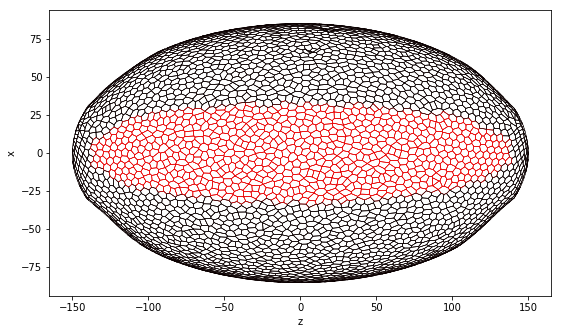

In [4]:
draw_specs = config.draw.sheet_spec()
sheet = open_sheet(dirname, 1)
sheet = sheet.extract_bounding_box(y_boundary=[0, 100])
fig, ax = plt.subplots()
edge_mask = 'is_mesoderm'
edge_mask_color_map='hot'
coords=['z', 'x']

list_edge_in_mesoderm = sheet.edge_df['face'].isin(
    sheet.face_df[sheet.face_df[edge_mask]].index)

cmap_edge = np.ones(sheet.edge_df.shape[0]) * list_edge_in_mesoderm/4
sheet.edge_df['col'] = cmap_edge / (max(cmap_edge))/4

cmap_edge = plt.cm.get_cmap(edge_mask_color_map, 4)
edge_color_cmap = cmap_edge(sheet.edge_df.col)
draw_specs['edge']['color'] = edge_color_cmap

draw_specs['edge']['visible'] = True
draw_specs['edge']['alpha'] = 0.7
draw_specs['vert']['visible'] = False
draw_specs['face']['visible'] = False
draw_specs['face']['alpha'] = 0.6

fig, ax = sheet_view(sheet, coords=coords, ax=ax, **draw_specs)
ax.set_xlabel(coords[0])
ax.set_ylabel(coords[1])

fig.set_size_inches(9.25, 5.25, forward=True)


ax.grid(False)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
#ax.axis('off')

/home/admin-suz/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


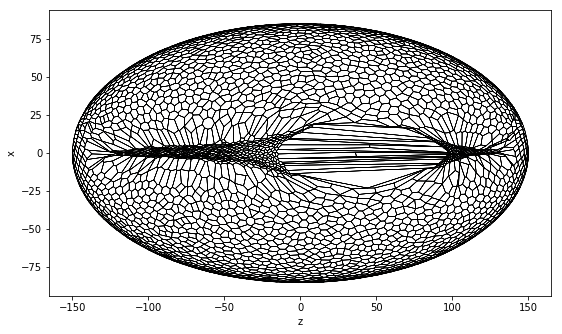

In [15]:
draw_specs = config.draw.sheet_spec()
sheet = open_sheet(dirname, 50)
sheet = sheet.extract_bounding_box(y_boundary=[0, 100])
fig, ax = plt.subplots()
edge_mask_color_map='gist_gray'
coords=['z', 'x']

list_cutting_edge = sheet.edge_df['face'].isin(
    sheet.face_df[sheet.face_df['contractility']<0.01].index)

cmap_edge = np.ones(sheet.edge_df.shape[0]) * list_cutting_edge
sheet.edge_df['col'] = cmap_edge / (max(cmap_edge))

cmap_edge = plt.cm.get_cmap(edge_mask_color_map, 2)
edge_color_cmap = cmap_edge(sheet.edge_df.col)
draw_specs['edge']['color'] = edge_color_cmap

draw_specs['edge']['visible'] = True
draw_specs['edge']['alpha'] = 1
draw_specs['vert']['visible'] = False
draw_specs['face']['visible'] = False
draw_specs['face']['alpha'] = 0.6

fig, ax = sheet_view(sheet, coords=coords, ax=ax, **draw_specs)
ax.set_xlabel(coords[0])
ax.set_ylabel(coords[1])

fig.set_size_inches(9.25, 5.25, forward=True)


ax.grid(False)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
#ax.axis('off')
#fig.savefig('../post_ablation.png', dpi = 150)

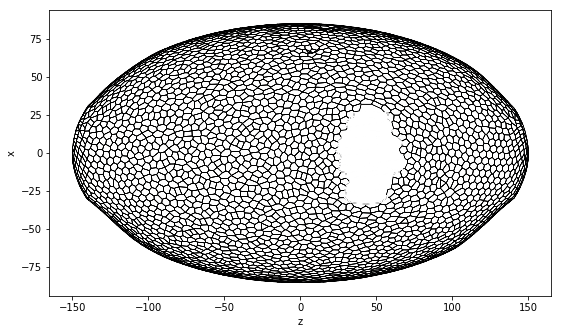

In [31]:
SIM_DIR = Path('/home/admin-suz/Documents/short_simulation/file_to_copy/2018-09-08_TEST3')
dirname = SIM_DIR/'1.08_contractility_5_critical_area_30_radialtension_0/'

draw_specs = config.draw.sheet_spec()
sheet = open_sheet(dirname, 1)
sheet = sheet.extract_bounding_box(y_boundary=[0, 150])
fig, ax = plt.subplots()
edge_mask_color_map='gist_gray'
coords=['z', 'x']

list_cutting_edge = sheet.edge_df['face'].isin(
    sheet.face_df[sheet.face_df['contractility']<=0.5].index)

cmap_edge = np.ones(sheet.edge_df.shape[0]) * list_cutting_edge
sheet.edge_df['col'] = cmap_edge / (max(cmap_edge))

cmap_edge = plt.cm.get_cmap(edge_mask_color_map, 2)
edge_color_cmap = cmap_edge(sheet.edge_df.col)
draw_specs['edge']['color'] = edge_color_cmap

draw_specs['edge']['visible'] = True
draw_specs['edge']['alpha'] = 1
draw_specs['vert']['visible'] = False
draw_specs['face']['visible'] = False
draw_specs['face']['alpha'] = 0.6

fig, ax = sheet_view(sheet, coords=coords, ax=ax, **draw_specs)
ax.set_xlabel(coords[0])
ax.set_ylabel(coords[1])

fig.set_size_inches(9.25, 5.25, forward=True)


ax.grid(False)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)

#ax.axis('off')
fig.savefig('../post_ablation.png', dpi = 300)

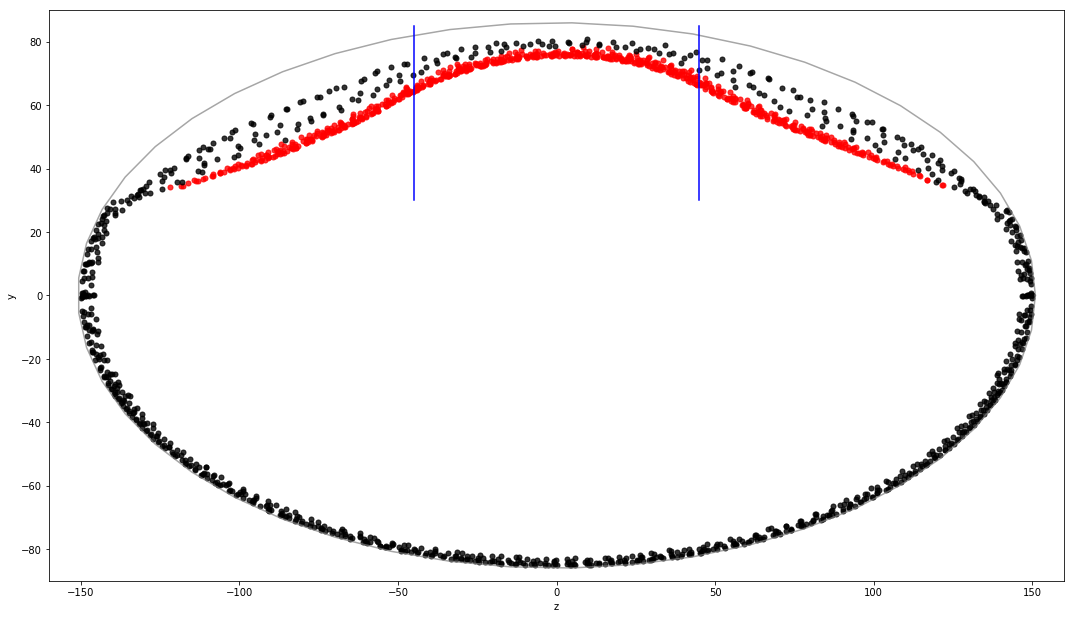

In [138]:
import matplotlib.gridspec as gridspec
#SIM_DIR = Path('/home/admin-suz/Documents/Simulations/Surface_tension/2018-11-15/')
SIM_DIR = Path('/media/admin-suz/Sophie/2018/Papiers-EMT-Melanie/datas/2018-09-07_TEST1/')
dirname = SIM_DIR/'1.08_contractility_5_critical_area_30_radialtension_0/'
sheet = open_sheet(dirname, 50)
sheet_mesoderm = sheet.extract('is_mesoderm')

sheet_mesoderm = sheet.face_df[(sheet.face_df['contractility']!=0) & 
                              (sheet.face_df['is_mesoderm'])]
sheet_ectoderm = sheet.face_df[(~sheet.face_df['is_mesoderm']) & (sheet.face_df.x>-20)&(sheet.face_df.x<20)]

edge_specs = {'alpha': 0.6,
              'lw': 0.1,
              'color': 'white'}
scatter_specs = {'alpha': 0.8,
                 'ms': 5,
                 'color': 'red'}


#plt.figure(figsize=(18.5, 10.5))
fig, ax = plt.subplots(figsize=(18.5, 10.5))



#Retire visuellement les cellules qui ont été ablaté apicalement
datasets={}
datasets['face'] = sheet.face_df[sheet.face_df['contractility']!=0].copy()

datasets['edge'] = sheet.edge_df[sheet.edge_df['face'].isin(
                    datasets['face'].index)].copy()
datasets['vert'] = sheet.vert_df.loc[sheet.edge_df['srce'].unique()].copy()

sheet = Sheet('subsheet', datasets, sheet.specs)
sheet.reset_index()
sheet.reset_topo()



u, v = ('z', 'y')
fig, ax = quick_edge_draw(sheet.extract_bounding_box(x_boundary=(-5,5)),
                          coords=('z', 'y'),
                          ax = ax,
                          **edge_specs)

ax.plot(sheet_mesoderm[u],
        sheet_mesoderm[v],
        'o', **scatter_specs)
scatter_specs = {'alpha': 0.8,
                 'ms': 5,
                 'color': 'k'}
ax.plot(sheet_ectoderm[u],
        sheet_ectoderm[v],
        'o', **scatter_specs)
"""
sheet_dead = sheet.face_df[sheet.face_df['contractility']!=0]
scatter_specs2 = {'alpha': 1,
                 'ms': 5.5,
                 'color': 'white'}
ax.plot(sheet_dead[u],
        sheet_dead[v],
        'o', **scatter_specs2)
        """


"""sheet = sheet.extract_bounding_box(x_boundary=(-10,10))
res=(sheet.edge_df[(sheet.edge_df.srce.isin(sheet.vert_df[sheet.vert_df.radial_tension==0].index))
                           &
                           (sheet.edge_df.trgt.isin(sheet.vert_df[sheet.vert_df.radial_tension==0].index))])
for f in res.face.unique() : 
    if len(res[res.face==f]) == 1:
        res= res.drop(res[res.face==f].index)
sheet_no_force = sheet.face_df[(sheet.face_df.index.isin(res.face.unique())) & sheet.face_df.is_mesoderm == True]
scatter_specs2 = {'alpha': 1,
                 'ms': 5.5,
                 'color': 'orange'}
ax.plot(sheet_no_force[u],
        sheet_no_force[v],
        'o', **scatter_specs2)"""

ax.set_ylim(-90,90)
ax.set_xlim(-160,160)

ax.set_xlabel(u)
ax.set_ylabel(v)

a = 86
c = 151
thetas = np.linspace(0, 2 * np.pi)
ax.plot(c * np.cos(thetas), a * np.sin(thetas), color='grey', alpha=0.7)

#ax.plot((-45,45), (30,30), color="blue")
ax.plot((-45,-45), (30,85), color= "blue")
ax.plot((45,45), (30,85), color='blue')

#plt.savefig('../TEST5_simul_15_coupe_50.png', dpi = 300)

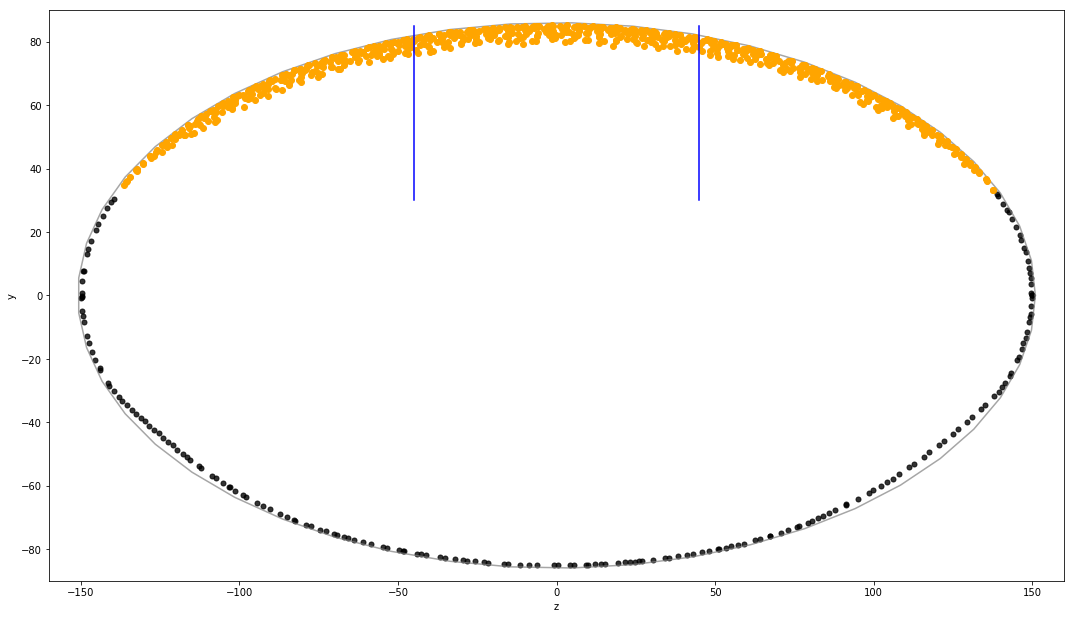

In [10]:
import matplotlib.gridspec as gridspec
#SIM_DIR = Path('/media/admin-suz/Sophie/2018/Papiers-EMT-Melanie/datas/Simulations/Ablations/2018-09-08_TEST3/')
#dirname = SIM_DIR/'1.08_contractility_5_critical_area_30_radialtension_0/'
#sheet = open_sheet(dirname, 50)

sheet_mesoderm = sheet.face_df[(sheet.face_df['is_mesoderm']) & (sheet.face_df.x>-5)&(sheet.face_df.x<5)]
sheet_ectoderm = sheet.face_df[(~sheet.face_df['is_mesoderm']) & (sheet.face_df.x>-5)&(sheet.face_df.x<5)
                              & (sheet.face_df.y>-100)&(sheet.face_df.y<32)]

edge_specs = {'alpha': 0.6,
              'lw': 0.1,
              'color': 'white'}
scatter_specs = {'alpha': 0.8,
                 'ms': 5,
                 'color': 'red'}


#plt.figure(figsize=(18.5, 10.5))
fig, ax = plt.subplots(figsize=(18.5, 10.5))



#Retire visuellement les cellules qui ont été ablaté apicalement
datasets={}
datasets['face'] = sheet.face_df[sheet.face_df['contractility']!=0].copy()

datasets['edge'] = sheet.edge_df[sheet.edge_df['face'].isin(
                    datasets['face'].index)].copy()
datasets['vert'] = sheet.vert_df.loc[sheet.edge_df['srce'].unique()].copy()

sheet = Sheet('subsheet', datasets, sheet.specs)
sheet.reset_index()
sheet.reset_topo()



u, v = ('z', 'y')
fig, ax = quick_edge_draw(sheet.extract_bounding_box(x_boundary=(-10,10)),
                          coords=('z', 'y'),
                          ax = ax,
                          **edge_specs)

ax.plot(sheet_mesoderm[u],
        sheet_mesoderm[v],
        'o', **scatter_specs)
scatter_specs = {'alpha': 0.8,
                 'ms': 5,
                 'color': 'k'}
ax.plot(sheet_ectoderm[u],
        sheet_ectoderm[v],
        'o', **scatter_specs)

ax.set_ylim(-90,90)
ax.set_xlim(-160,160)

ax.set_xlabel(u)
ax.set_ylabel(v)

a = 86
c = 151
thetas = np.linspace(0, 2 * np.pi)
ax.plot(c * np.cos(thetas), a * np.sin(thetas), color='grey', alpha=0.7)


pulling_vert = sheet.vert_df[sheet.vert_df.radial_tension==0].index
pulling_face = sheet.edge_df[sheet.edge_df.srce.isin(pulling_vert)].face.unique()
ax.plot(sheet.face_df[sheet.face_df.index.isin(pulling_face) & sheet.face_df.is_mesoderm].z,
        sheet.face_df[sheet.face_df.index.isin(pulling_face) & sheet.face_df.is_mesoderm].y,
       'o', color='orange')

pulling_vert = sheet.vert_df[sheet.vert_df.radial_tension>0].index
pulling_face = sheet.edge_df[sheet.edge_df.srce.isin(pulling_vert)].face.unique()
ax.plot(sheet.face_df[sheet.face_df.index.isin(pulling_face) & sheet.face_df.is_mesoderm].z,
        sheet.face_df[sheet.face_df.index.isin(pulling_face) & sheet.face_df.is_mesoderm].y,
       'o', color='green')



#ax.plot(sheet.vert_df.z, sheet.vert_df['is_active']*20, 'ko')
ax.plot((-45,-45), (30,85), color= "blue")

ax.plot((45,45), (30,85), color='blue')
#plt.savefig('../TEST5_simul_0_coupe_50.png', dpi = 300)

In [237]:
sheet.face_df[sheet.face_df.is_mesoderm]

,z,x,num_sides,area,perimeter,is_alive,y,face_o,height,rho,contractility,prefered_area,area_elasticity,prefered_height,prefered_vol,is_mesoderm,is_relaxation,id,enter_in_process
face,,,,,,,,,,,,,,,,,,,
45,118.023428,-0.515086,6,2.309618,6.957430,True,22.531024,45,25.168292,22.537941,5.966199,28.0,1.0,32,896,True,False,45,0
46,120.130873,-0.046530,6,2.633432,6.906638,True,22.136293,46,26.330368,22.138421,6.584441,28.0,1.0,32,896,True,False,46,0
47,121.134525,-0.581238,7,2.624140,7.152820,True,23.053563,47,28.028727,23.062065,7.967453,28.0,1.0,32,896,True,False,47,0
48,117.186352,-0.057828,6,3.189334,7.459415,True,21.649067,48,23.679654,21.651207,5.686467,28.0,1.0,32,896,True,False,48,0
49,120.948002,1.208444,6,2.220395,7.117179,True,21.431820,49,26.291570,21.469407,6.842586,28.0,1.0,32,896,True,False,49,0
50,117.651787,1.214358,7,2.199507,7.047769,True,20.857316,50,23.258139,20.895406,7.035795,28.0,1.0,32,896,True,False,50,0
51,119.851164,1.734636,6,1.570629,6.177001,True,21.346165,51,25.397283,21.418086,6.468373,28.0,1.0,32,896,True,False,51,0
52,114.701238,1.525472,7,2.031953,6.697553,True,20.503260,52,20.868794,20.561145,6.326607,28.0,1.0,32,896,True,False,52,0
53,114.945184,0.965738,5,1.584014,6.010239,True,20.393871,53,20.889331,20.419883,4.479469,28.0,1.0,32,896,True,False,53,0


In [241]:
pulling_vert = sheet.vert_df[sheet.vert_df.radial_tension>0].index
pulling_face = sheet.edge_df[sheet.edge_df.srce.isin(pulling_vert)].face.unique()
sheet.face_df[sheet.face_df.index.isin(pulling_face) & sheet.face_df.is_mesoderm].z

,z,x,num_sides,area,perimeter,is_alive,y,face_o,height,rho,contractility,prefered_area,area_elasticity,prefered_height,prefered_vol,is_mesoderm,is_relaxation,id,enter_in_process
face,,,,,,,,,,,,,,,,,,,
45,118.023428,-0.515086,6,2.309618,6.957430,True,22.531024,45,25.168292,22.537941,5.966199,28.0,1.0,32,896,True,False,45,0
46,120.130873,-0.046530,6,2.633432,6.906638,True,22.136293,46,26.330368,22.138421,6.584441,28.0,1.0,32,896,True,False,46,0
47,121.134525,-0.581238,7,2.624140,7.152820,True,23.053563,47,28.028727,23.062065,7.967453,28.0,1.0,32,896,True,False,47,0
48,117.186352,-0.057828,6,3.189334,7.459415,True,21.649067,48,23.679654,21.651207,5.686467,28.0,1.0,32,896,True,False,48,0
49,120.948002,1.208444,6,2.220395,7.117179,True,21.431820,49,26.291570,21.469407,6.842586,28.0,1.0,32,896,True,False,49,0
50,117.651787,1.214358,7,2.199507,7.047769,True,20.857316,50,23.258139,20.895406,7.035795,28.0,1.0,32,896,True,False,50,0
51,119.851164,1.734636,6,1.570629,6.177001,True,21.346165,51,25.397283,21.418086,6.468373,28.0,1.0,32,896,True,False,51,0
52,114.701238,1.525472,7,2.031953,6.697553,True,20.503260,52,20.868794,20.561145,6.326607,28.0,1.0,32,896,True,False,52,0
53,114.945184,0.965738,5,1.584014,6.010239,True,20.393871,53,20.889331,20.419883,4.479469,28.0,1.0,32,896,True,False,53,0
